In [ ]:
#hide


# n-Gmaps

> Implementations of gmaps in Python.

Quick start

1. git clone this repo
2. `export PYTHONPATH=$(pwd)`
3. `make` will generate the importable python files from the notebooks
3. `jupyter notebook`


## Construction of n-Gmaps

Currently there are three options to construct an n-Gmap:

1. Zoo examples. There is a collection of gmaps in `combinatorial.zoo`
1. 2D maps representing pixel R $\times$ C pixel arrays
1. 2D maps maps from labeled images, such as those found in `combinatorial.zoo_labels`

In [ ]:
from combinatorial.gmaps import nGmap
from combinatorial.zoo import G2_SQUARE_BOUNDED

### Constructing n-Gmaps from toy examples

see the other strings and their comment in `zoo` notebook

In [ ]:
print (G2_SQUARE_BOUNDED)   #  this is just a multi-line string

    1 0 3 2 5 4 7 6
    7 2 1 4 3 6 5 0
    0 1 2 3 4 5 6 7



In [ ]:
G = nGmap.from_string (G2_SQUARE_BOUNDED)
G

2-gMap of 8 darts:
  # 0-cells: 4
  # 1-cells: 4
  # 2-cells: 1
  # ccs    : 1

In [ ]:
G.print_alpha_table()

 D# |   0  1  2  3  4  5  6  7 
-------------------------------
 α0 |   1  0  3  2  5  4  7  6 
 α1 |   7  2  1  4  3  6  5  0 
 α2 |   0  1  2  3  4  5  6  7 


In [ ]:
# some members, dimension, number of darts, validity check
G.n, G.n_darts, G.is_valid

(2, 8, True)

### Construction of Pixel Maps

Construct a 2-gMap that corresponds to 2D images -- either bounded or unbounded ones.
The unbounded PixelMaps have the additional background face.

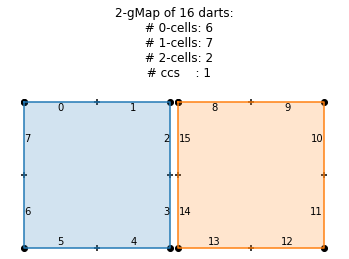

In [ ]:
from combinatorial.pixelmap import PixelMap

# bounded pixel map exmple
bpm = PixelMap.from_shape(1,2)
bpm.plot_faces()

In [ ]:
bpm.print_alpha_table()
bpm


 D# |   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
-------------------------------------------------------
 α0 |   1  0  3  2  5  4  7  6  9  8 11 10 13 12 15 14 
 α1 |   7  2  1  4  3  6  5  0 15 10  9 12 11 14 13  8 
 α2 |   0  1 15 14  4  5  6  7  8  9 10 11 12 13  3  2 


2-gMap of 16 darts:
  # 0-cells: 6
  # 1-cells: 7
  # 2-cells: 2
  # ccs    : 1

In [ ]:
# unbounded pixel map example
# note the extra 2-cell (background)

upm = PixelMap.from_shape(1,2, bounded=False)
upm

2-gMap of 28 darts:
  # 0-cells: 6
  # 1-cells: 7
  # 2-cells: 3
  # ccs    : 1

In [ ]:
upm.print_alpha_table()

 D# |   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
-------------------------------------------------------------------------------------------
 α0 |   1  0  3  2  5  4  7  6  9  8 11 10 13 12 15 14 17 16 19 18 21 20 23 22 25 24 27 26 
 α1 |   7  2  1  4  3  6  5  0 15 10  9 12 11 14 13  8 27 18 17 20 19 22 21 24 23 26 25 16 
 α2 |  27 26 15 14 19 18 17 16 25 24 23 22 21 20  3  2  7  6  5  4 13 12 11 10  9  8  1  0 


## Iteration techniques


### Dart iteration

The `darts` member is a generator, so you can iterate (rather than creating unnecessary copies):

In [ ]:
for d in bpm.darts:
    print (d, end = ' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

In [ ]:
set (bpm.darts)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

### Orbit iteration = i-Cells

Similarly, orbits are generators rather than sets.

Lets have a look at 0-cells, 1-cells, and 2-cells containing dart 6.
The `cell_i` mambers are shortcuts to the `orbit` members.

In [ ]:
set (bpm.cell_0 (6)),   set (bpm.orbit ([1,2], 6))

({5, 6}, {5, 6})

In [ ]:
set (bpm.cell_1 (6)),   set (bpm.orbit ([0,2], 6))

({6, 7}, {6, 7})

In [ ]:
set (bpm.cell_2 (6)),   set (bpm.orbit ([0,1], 6))

({0, 1, 2, 3, 4, 5, 6, 7}, {0, 1, 2, 3, 4, 5, 6, 7})

## Dual

The nice feature of gMaps is that the dual has reverted the involutions.
Represented by tables, we can thus have an in-place dual view.
Similar to numpy transpose we have member `nGmap.D` to access gmap's dual.

In [ ]:
print ('Primal: ', bpm, 'Dual: ', bpm.D)


Primal:  2-gMap of 16 darts:
  # 0-cells: 6
  # 1-cells: 7
  # 2-cells: 2
  # ccs    : 1
 Dual:  2-gMap of 16 darts:
  # 0-cells: 2
  # 1-cells: 7
  # 2-cells: 6
  # ccs    : 1



In [ ]:
print ('Involutions of the primal: ')
bpm.print_alpha_table()
print ('Involutions of the dual:')
bpm.D.print_alpha_table()

Involutions of the primal: 
 D# |   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
-------------------------------------------------------
 α0 |   1  0  3  2  5  4  7  6  9  8 11 10 13 12 15 14 
 α1 |   7  2  1  4  3  6  5  0 15 10  9 12 11 14 13  8 
 α2 |   0  1 15 14  4  5  6  7  8  9 10 11 12 13  3  2 
Involutions of the dual:
 D# |   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
-------------------------------------------------------
 α0 |   0  1 15 14  4  5  6  7  8  9 10 11 12 13  3  2 
 α1 |   7  2  1  4  3  6  5  0 15 10  9 12 11 14 13  8 
 α2 |   1  0  3  2  5  4  7  6  9  8 11 10 13 12 15 14 


## Removal and contraction

n-Gmaps allow to remove (contract) i-cells that are incident at most two i+1 (i-1) cells.
Let's remove the edge between the labels ...

 D# |   0  1  4  5  6  7  8  9 10 11 12 13 
-------------------------------------------
 α0 |   1  0  5  4  7  6  9  8 11 10 13 12 
 α1 |   7  8 13  6  5  0  1 10  9 12 11  4 
 α2 |   0  1  4  5  6  7  8  9 10 11 12 13 


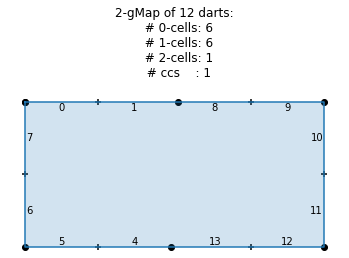

In [ ]:
bpm.remove_edge(2)
bpm.print_alpha_table()
bpm.plot_faces()

... and lets remove two vertices.
Note that the vertex containing dart 1 can be equivalently removed by contracting the corresponding face of the dual.

 D# |   0  5  6  7  9 10 11 12 
-------------------------------
 α0 |   9 12  7  6  0 11 10  5 
 α1 |   7  6  5  0 10  9 12 11 
 α2 |   0  5  6  7  9 10 11 12 


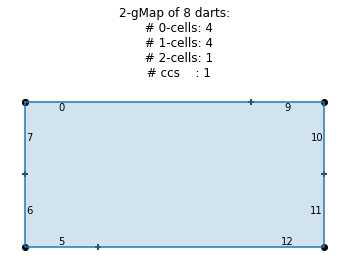

In [ ]:
bpm.D.contract_face(1)  #  bpm.remove_vertex(1) would do the same job
bpm.remove_vertex(4)

bpm.print_alpha_table()
bpm.plot_faces()

## 2-gMaps from labels

3-faces spiral example.

1. Pick some label image, e.g, from `zoo_labels`
1. create a 2-gMap out of the label image
1. remove edges and vertices
1. plot it

In [ ]:
# Similar to gmap-zoo `G2_...` strings, `L2_SPIRAL_WW` is just a multi-line string.

from combinatorial.zoo_labels import L2_SPIRAL_WB, str2labels

print (L2_SPIRAL_WB)

. . . . . . . . . w w w w w w w w w w w w w
. w w w w w w w . w . . . . . . . . . . . w
. w . . . . . w . w . w w w w w w w w w . w
. w . w w w . w . w . w . . . . . . . w . w
. w . w . w . w . w . w . w w w w w . w . w
. w . w . w w w . w . w . w . . . w . w . w
. w . w . . . . . w . w . w . w . w . w . w
. w . w w w w w w w . w . w . w . . . w . w
. w . . . . . . . . . w . w . w w w w w . w
. w w w w w w w w w w w . w . . . . . . . w
. . . . . . . . . . . . . w w w w w w w w w



In [ ]:
# convert the string to an RGB image

from combinatorial.pixelmap import LabelMap

image = str2labels (L2_SPIRAL_WB)
image.shape

(11, 22, 3)

In [ ]:
# construct a 2-gMap out of the lables

lm_spiral = LabelMap.from_labels (image)
lm_spiral

2-gMap of 1936 darts:
  # 0-cells: 276
  # 1-cells: 517
  # 2-cells: 242
  # ccs    : 1

In [ ]:
# simplify the 2-gMap

lm_spiral.remove_edges()
lm_spiral.remove_vertices()
lm_spiral

2-gMap of 8 darts:
  # 0-cells: 2
  # 1-cells: 3
  # 2-cells: 2
  # ccs    : 1

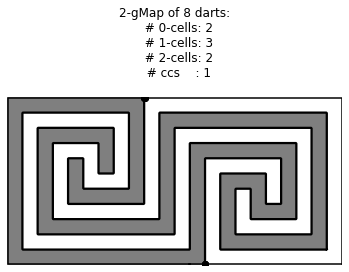

In [ ]:
lm_spiral.plot(number_darts=False)